# Linear Regression project
   Kaustav Bhattacharjee

### The goal is to creating a model to predict the best variables that have an effect on the increase or decrease in usage of rented bikes for both casual and registered customers for BoomBikes, as, the brand is planning to get back into the business, we have to predict the best variables that have significance in determining the increase or decrease of the usage of shared bikes.

## Importing all necessary libraries

In [2]:
import os
import time
import re

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.api import OLS
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf

from scipy import misc
from scipy import optimize
from scipy import interpolate
from scipy import integrate
import scipy.io as spio
from scipy import stats
from scipy.stats import distributions

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [9]:
df = pd.read_csv('day.csv', parse_dates = True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1. Checking the structure, info and description of the data set for further analysis

In [3]:
# Checking the shape of the dataset

df.shape

(730, 16)

In [4]:
# checking for null values in the dataset

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
#Checking the types of all the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking the description of the dataset for better understanding of the distribution of data for numeric columns

round(df.describe(),2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [7]:
#Creating Pandas Profile for the dataset

profile = ProfileReport(df = df, title="Pandas Profiling Report")
profile.to_file("report.html")

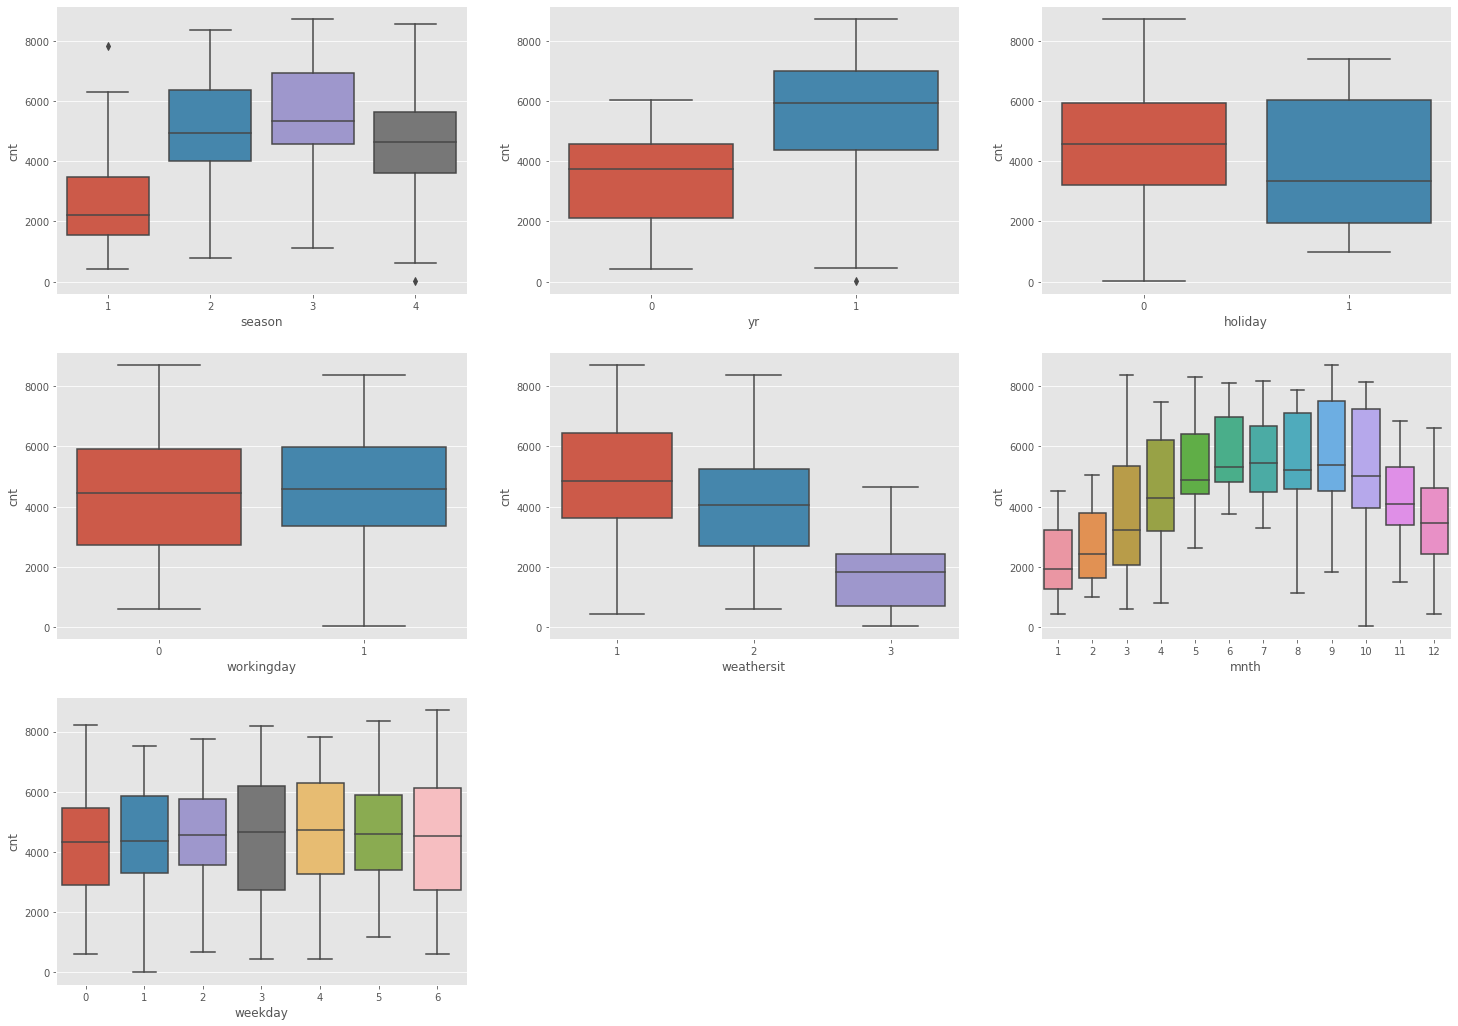

In [8]:
# Checking for relation between 'cnt' and all other categorical variable which are relevant

plt.style.use('ggplot')
plt.figure(figsize=(25,18))
plt.subplot(3,3,1)
sns.boxplot(data= df, x = 'season', y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data= df, x = 'yr', y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data= df, x = 'holiday', y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data= df, x = 'workingday', y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data= df, x = 'weathersit', y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data= df, x = 'mnth', y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data= df, x = 'weekday', y = 'cnt')
plt.show()

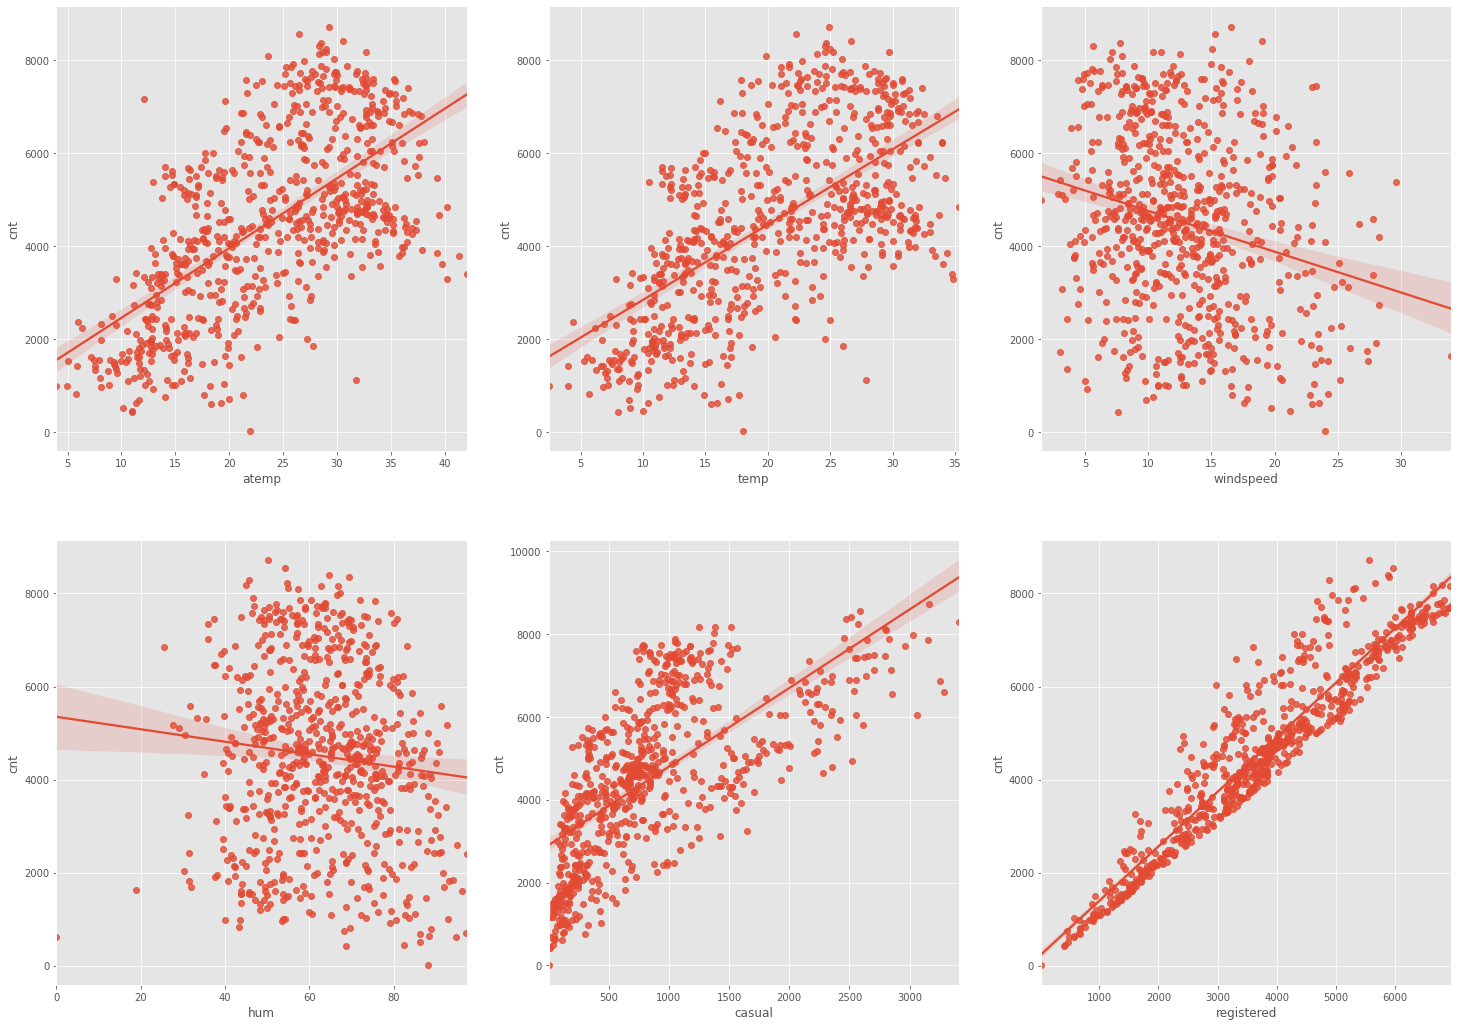

In [9]:
# Checking for relation between 'cnt' and other numerical variable

plt.style.use('ggplot')
plt.figure(figsize=(25,18))
plt.subplot(2,3,1)
sns.regplot(data= df, x = 'atemp', y = 'cnt')
plt.subplot(2,3,2)
sns.regplot(data= df, x = 'temp', y = 'cnt')
plt.subplot(2,3,3)
sns.regplot(data= df, x = 'windspeed', y = 'cnt')
plt.subplot(2,3,4)
sns.regplot(data= df, x = 'hum', y = 'cnt')
plt.subplot(2,3,5)
sns.regplot(data= df, x = 'casual', y = 'cnt')
plt.subplot(2,3,6)
sns.regplot(data= df, x = 'registered', y = 'cnt')
plt.show()

- We can see positive linear relation between 'cnt' and 'atemp'

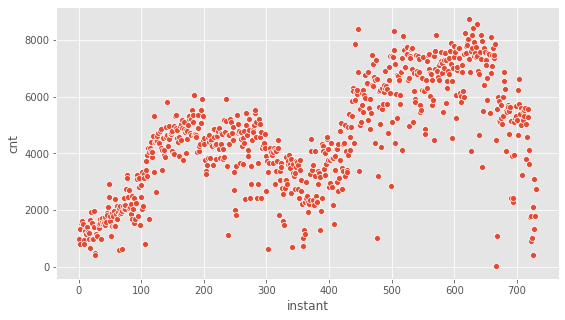

In [10]:
# Distribution between count and Dependent variable

plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x ='instant', y ='cnt')
plt.show()

## 2. Cleaning the dataset for further analysis

#### In the dataset, ['instant', 'dteday', 'temp', 'casual', 'registered'] these columns are of less importance for model building, below are the reasons:
    1. 'instant': this column is a continuous variable which gives us the number of rows(data points) that are present in the dataset.
    
    2. 'dteday': Values from this column is also separately available in the dataset, so, instead of using this column, using the columns which contains the same information.
    
    3. 'temp': Variance in the dependent variable that is explained by this column, can also be explained by 'atemp' column, as 'atemp' column gives us the 'feels like' temperature which is more relevant to outdoor activity, we have decided to go with 'atemp' column instead of 'temp' column for model building.
    
    4. 'casual' & 'registered': Both of these variables sums up to the total count of the number of users, as the total count of number of users is our dependent variable and as it is the sum of these two variable, it is 
    quite obvious that relevance of these to variables is very low, though there is a strong correlation.

In [11]:
#dropping unimpotant columns and creating a new data frame with relevant columns

final_df = df.drop(['instant', 'dteday', 'temp', 'casual', 'registered'], axis=1)
final_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### 2.1 Converting the categorical variables which are represented by numbers and changing the corresponding numbers to relevant category

In [12]:
# Checking the counts of each categories in the 'season' column

final_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
# Writing a function to convert neumerical represention of the categories in the season variable in to actual seasons

def seasons (x):
    if x == 1:
        return('spring')
    elif x == 2:
        return('summer')
    elif x == 3:
        return('fall')
    elif x == 4:
        return('winter')

In [14]:
# Applying the fuction to convert neumerical represention of the categories in the season variable in to actual season
# Checking the counts of each categories after applying the function

final_df['season'] = final_df.season.apply(seasons)
final_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# Writing a function to convert neumerical represention of the categories in the 'mnth' variable in to actual months
# Checking the counts of each categories after applying the function

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']
                                            
def mnth_map(x):
    return months[x-1]

final_df['mnth'] = final_df.mnth.apply(mnth_map)
final_df.mnth.value_counts()

dec    62
jan    62
mar    62
jul    62
oct    62
may    62
aug    62
sep    60
nov    60
jun    60
apr    60
feb    56
Name: mnth, dtype: int64

In [16]:
# Writing a function to convert neumerical represention of the categories in the 'yr' variable in to actual years
# Checking the counts of each categories after applying the function

year = ['2011','2012']
                                            
def year_map(x):
    return year[x-1]

final_df['yr'] = final_df.yr.apply(year_map)
final_df.yr.value_counts()

2012    365
2011    365
Name: yr, dtype: int64

In [17]:
# Writing a function to convert neumerical represention of the categories in the 'weekday' variable in to actual weekdays
# Checking the counts of each categories after applying the function

wk = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri','sat']
                                            
def wk_map(x):
    return wk[x-1]

final_df['weekday'] = final_df.weekday.apply(wk_map)
final_df.weekday.value_counts()

sun    105
fri    105
sat    105
wed    104
thu    104
mon    104
tue    103
Name: weekday, dtype: int64

In [18]:
# Writing a function to convert neumerical represention of the categories in the 'weathersit' variable in to actual weather categories
# Checking the counts of each categories after applying the function

weather = ['clear', 'cloudy', 'rainy']

def weather_map(x):
    return weather[x-1]

final_df['weathersit'] = final_df.weathersit.apply(weather_map)
final_df.weathersit.value_counts()

clear     463
cloudy    246
rainy      21
Name: weathersit, dtype: int64

In [19]:
# Checking the new data frame which has all the categorical features in categorical form

final_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2012,jan,0,fri,0,cloudy,18.18125,80.5833,10.749882,985
1,spring,2012,jan,0,sat,0,cloudy,17.68695,69.6087,16.652113,801
2,spring,2012,jan,0,sun,1,clear,9.47025,43.7273,16.636703,1349
3,spring,2012,jan,0,mon,1,clear,10.60610,59.0435,10.739832,1562
4,spring,2012,jan,0,tue,1,clear,11.46350,43.6957,12.522300,1600


### 2.2 Making the dataset ready for building the model

- 2.2.1 Creating Dummy Variables for all the categorical features in the new dataset.
- 2.2.2 Adding them into the new dataset.
- 2.2.3 Dropping categorical columns from the dataset for which Dummy Variables are created and added into the dataset.

In [20]:
# Creating Dummy Variables

season_dummies  = pd.get_dummies(final_df.season, drop_first= True)
year_dummies  = pd.get_dummies(final_df.yr, drop_first= True)
weekday_dummies  = pd.get_dummies(final_df.weekday, drop_first= True)
weather_dummies  = pd.get_dummies(final_df.weathersit, drop_first= True)
months_dummies  = pd.get_dummies(final_df.mnth, drop_first= True)

In [21]:
# Adding Dummy Variables into the dataset

final_df = pd.concat([final_df,season_dummies, year_dummies, weekday_dummies, weather_dummies, months_dummies], axis=1)

In [22]:
# Dropping categorical columns

final_df = final_df.drop(['season', 'yr', 'mnth', 'weekday', 'weathersit'], axis=1)

In [23]:
# Checking the final dataset
final_df.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2012,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [24]:
# Checking the shape of final dataset

final_df.shape

(730, 29)

## 3. Model Building

### 3.1 Creating Train and Test datasets

In [25]:
train, test = train_test_split(final_df, train_size = .75,random_state =100)

In [26]:
train.shape

(547, 29)

In [27]:
test.shape

(183, 29)

### 3.2 Transforming numeric columns in both 'train' & 'test' datasets using StandardScaller to get the data from mentioned columns into same scale

In [28]:
clms = ['atemp', 'hum', 'windspeed', 'cnt']
st = StandardScaler()

train[clms] = st.fit_transform(train[clms])
test[clms] = st.transform(test[clms])

In [29]:
# Checking the scalled trainng dataset

train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2012,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
311,0,1,-0.350016,0.644081,-1.548612,-0.134050,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
523,0,1,0.801459,-1.166982,-0.196494,1.673030,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
381,0,1,-0.647587,0.604256,2.012594,-0.784005,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
413,0,0,-0.702507,-0.691174,0.001164,-0.076219,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
253,0,0,0.871975,0.587576,-0.963540,0.296354,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Checking the scalled testing dataset

test.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2012,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,1,0,1.220539,0.046341,-1.390424,0.806594,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
535,0,1,1.565195,-0.280785,-0.979332,0.892572,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,-0.072097,1.295350,0.088054,-0.925255,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
221,0,1,1.341918,-1.479234,0.119777,0.160221,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,1,1.087318,-2.329752,1.289870,0.256435,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


### 3.3 Separating Dependent variable from both 'training' & 'testing' dataset and storing them into new variables

In [31]:
y_train = train.pop('cnt')
X_train = train

y_test = test.pop('cnt')
X_test = test

In [32]:
# Checking the shape of training labels

y_train.shape

(547,)

In [33]:
# Checking the shape of testing labels

y_test.shape

(183,)

In [34]:
# Checking the shape of training variables

X_train.shape

(547, 28)

In [35]:
# Checking the shape of testing variables

X_test.shape

(183, 28)

### 3.4 Getting the significant data for model building

#### 3.4.1  Instantiating and fitting the data in the model

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### 3.4.2  Instantiating RFE to get desired number of significant columns from the previously trained model

In [37]:
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [38]:
# Checking the relevant columns returned by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2012', True, 1),
 ('mon', False, 3),
 ('sat', True, 1),
 ('sun', False, 2),
 ('thu', False, 9),
 ('tue', False, 5),
 ('wed', False, 4),
 ('cloudy', True, 1),
 ('rainy', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', False, 8),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', True, 1)]

#### 3.4.3 Getting the list of significant columns returned by RFE

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'may', 'nov', 'sep'],
      dtype='object')

#### 3.4.4 Creating new training and testing datasets based on significant columns returned by RFE

- Using 20 columns which are marked significant by RFE

In [40]:
X_train_new = X_train[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'may', 'nov', 'sep']]

In [41]:
X_test_new = X_test[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'may', 'nov', 'sep']]

In [42]:
# Adding constant in the training dataset of indipendent variables

X_train_new = sm.add_constant(X_train_new)

In [43]:
# Adding constant in the testing dataset of indipendent variables

X_test_new = sm.add_constant(X_test_new)

### 3.5.1 Building Model

In [44]:
lm_ols = sm.OLS(y_train, X_train_new).fit()

In [45]:
#Checking the summary of the model

print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.07e-203
Time:                        11:07:13   Log-Likelihood:                -252.62
No. Observations:                 547   AIC:                             547.2
Df Residuals:                     526   BIC:                             637.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6026      0.106      5.702      0.0

In [46]:
# Checking Variance Inflation Factor for all the variables that are present in the model (excluding the 'const' column)

vif = pd.DataFrame()
X = X_train_new.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.60
4,spring,4.05
14,jan,2.61
6,winter,2.53
5,summer,2.51
9,cloudy,2.39
15,jul,2.09
13,feb,2.05
17,may,2.02
16,jun,2.01


In [47]:
X_train_prd = lm_ols.predict(X_train_new)

In [48]:
r2_score(y_train, X_train_prd)

0.8525435594487394

In [49]:
X_test_prd = lm_ols.predict(X_test_new)

In [50]:
r2_score(y_test, X_test_prd)

0.8145596581427413

- From the above data we can clearly see that the P value for the the 'July' column is highest amongst the all and 'atemp' has the highest VIF value

- Removing 'July' column from both Training and Testing datasets

In [51]:
X_train_new_1 = X_train_new[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan',
       'jun', 'may', 'nov', 'sep']]

In [52]:
X_test_new_1 = X_test_new[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan',
       'jun', 'may', 'nov', 'sep']]

In [53]:
# Adding constant in the training dataset of indipendent variables

X_train_new_1 = sm.add_constant(X_train_new_1)

In [54]:
# Adding constant in the testing dataset of indipendent variables

X_test_new_1 = sm.add_constant(X_test_new_1)

### 3.5.2 Building new model (After removing 'July' column)

In [55]:
lm_ols_1 = sm.OLS(y_train, X_train_new_1).fit()

In [56]:
print(lm_ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     160.2
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          9.85e-205
Time:                        11:07:13   Log-Likelihood:                -252.79
No. Observations:                 547   AIC:                             545.6
Df Residuals:                     527   BIC:                             631.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5591      0.074      7.580      0.0

In [57]:
# Checking Variance Inflation Factor for all the variables that are present in the new model (excluding the 'const' column)

vif = pd.DataFrame()
X = X_train_new_1.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,4.05
1,atemp,3.02
5,summer,2.51
6,winter,2.50
14,jan,2.40
9,cloudy,2.25
13,feb,1.99
16,may,1.90
7,2012,1.84
17,nov,1.83


In [58]:
X_train_prd_1 = lm_ols_1.predict(X_train_new_1)

In [59]:
r2_score(y_train, X_train_prd_1)

0.8524511700161808

In [60]:
X_test_prd_1 = lm_ols_1.predict(X_test_new_1)

In [61]:
r2_score(y_test, X_test_prd_1)

0.8131338768825587

- From the above data we can clearly see that the the P value for the 'May' column is relatively high(6%), and we don't see any independent variable with a VIF higher than (5).

- Removing 'May' column from both Training and Testing datasets

In [62]:
X_train_new_2 = X_train_new_1[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan',
       'jun', 'nov', 'sep']]

In [63]:
X_test_new_2 = X_test_new_1[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan',
       'jun', 'nov', 'sep']]

In [64]:
# Adding constant in the training dataset of indipendent variables

X_train_new_2 = sm.add_constant(X_train_new_2)

In [65]:
# Adding constant in the testing dataset of indipendent variables

X_test_new_2 = sm.add_constant(X_test_new_2)

### 3.5.3 Building new model (After removing 'May' column)

In [66]:
lm_ols_2 = sm.OLS(y_train, X_train_new_2).fit()

In [67]:
print(lm_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          4.35e-205
Time:                        11:07:14   Log-Likelihood:                -254.63
No. Observations:                 547   AIC:                             547.3
Df Residuals:                     528   BIC:                             629.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5482      0.074      7.436      0.0

In [68]:
# Checking Variance Inflation Factor for all the variables that are present in the new model (excluding the 'const' column)

vif = pd.DataFrame()
X = X_train_new_2.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,4.02
1,atemp,2.81
6,winter,2.50
14,jan,2.39
9,cloudy,2.25
13,feb,1.98
7,2012,1.84
16,nov,1.82
2,hum,1.77
12,dec,1.68


In [69]:
X_train_prd_2 = lm_ols_2.predict(X_train_new_2)

In [70]:
r2_score(y_train, X_train_prd_1)

0.8524511700161808

In [71]:
X_test_prd_2 = lm_ols_2.predict(X_test_new_2)

In [72]:
r2_score(y_test, X_test_prd_2)

0.809016682113429

- From the above data we can clearly see that the the P value for the 'June' column is relatively high(12.5%), and we don't see any independent variable with a VIF higher than (5).

- Removing 'June' column from both Training and Testing datasets

In [73]:
X_train_new_3 = X_train_new_2[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan',
       'nov', 'sep']]

In [74]:
X_test_new_3 = X_test_new_2[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'feb', 'jan',
       'nov', 'sep']]

In [75]:
# Adding constant in the training dataset of indipendent variables

X_train_new_3 = sm.add_constant(X_train_new_3)

In [76]:
# Adding constant in the testing dataset of indipendent variables

X_test_new_3 = sm.add_constant(X_test_new_3)

### 3.5.4 Building new model (After removing 'June' column)

In [77]:
lm_ols_3 = sm.OLS(y_train, X_train_new_3).fit()

In [78]:
print(lm_ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.04e-205
Time:                        11:07:14   Log-Likelihood:                -255.85
No. Observations:                 547   AIC:                             547.7
Df Residuals:                     529   BIC:                             625.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5515      0.074      7.475      0.0

In [79]:
# Checking Variance Inflation Factor for all the variables that are present in the new model (excluding the 'const' column)

vif = pd.DataFrame()
X = X_train_new_3.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,4.01
6,winter,2.50
1,atemp,2.41
14,jan,2.36
9,cloudy,2.24
13,feb,1.97
7,2012,1.83
15,nov,1.81
2,hum,1.72
12,dec,1.66


In [80]:
X_train_prd_3 = lm_ols_3.predict(X_train_new_3)

In [81]:
r2_score(y_train, X_train_prd_3)

0.8507914881243034

In [82]:
X_test_prd_3 = lm_ols_3.predict(X_test_new_3)

In [83]:
r2_score(y_test, X_test_prd_3)

0.8100620405479675

- From the above data we can clearly see that the the P value for the 'Feb' column is relatively high(6.4%), and we don't see any independent variable with a VIF higher than (5).

- Removing 'Feb' column from both Training and Testing datasets

In [84]:
X_train_new_4 = X_train_new_3[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'jan',
       'nov', 'sep']]

In [85]:
X_test_new_4 = X_test_new_3[['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2012', 'sat', 'cloudy', 'rainy', 'aug', 'dec', 'jan',
       'nov', 'sep']]

In [86]:
# Adding constant in the training dataset of indipendent variables

X_train_new_4 = sm.add_constant(X_train_new_4)

In [87]:
# Adding constant in the testing dataset of indipendent variables

X_test_new_4 = sm.add_constant(X_test_new_4)

### 3.5.4 Building new model (After removing 'Feb' column)

In [88]:
lm_ols_4 = sm.OLS(y_train, X_train_new_4).fit()

In [89]:
print(lm_ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     187.4
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          4.10e-206
Time:                        11:07:14   Log-Likelihood:                -257.62
No. Observations:                 547   AIC:                             549.2
Df Residuals:                     530   BIC:                             622.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5295      0.073      7.255      0.0

In [90]:
# Checking Variance Inflation Factor for all the variables that are present in the new model (excluding the 'const' column)

vif = pd.DataFrame()
X = X_train_new_4.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,2.75
6,winter,2.47
1,atemp,2.34
9,cloudy,2.23
7,2012,1.83
14,nov,1.79
2,hum,1.72
13,jan,1.71
5,summer,1.54
12,dec,1.51


In [91]:
X_train_prd_4 = lm_ols_4.predict(X_train_new_4)

In [92]:
r2_score(y_train, X_train_prd_4)

0.8498226097459174

In [93]:
X_test_prd_4 = lm_ols_4.predict(X_test_new_4)

In [94]:
r2_score(y_test, X_test_prd_4)

0.8068619483508761

- Checking if the R^2 value in terms of predicting the testing set is significantly different than that of training set

In [95]:
(r2_score(y_train, X_train_prd_4) - r2_score(y_test, X_test_prd_4))*100 # less than 5% difference

4.296066139504129

#### In the last model (lm_ols_4) we can clearly see that the model performance has dropped very little after removing the 'Feb' variable, but, there are no columns which has a significantly high P value and there are no columns which has a high VIF value,so, considering this as the final model and further confirming the assumptions:

In [96]:
residuals = (y_test - X_test_prd_4)
residuals.shape

(183,)

## Model Evaluation

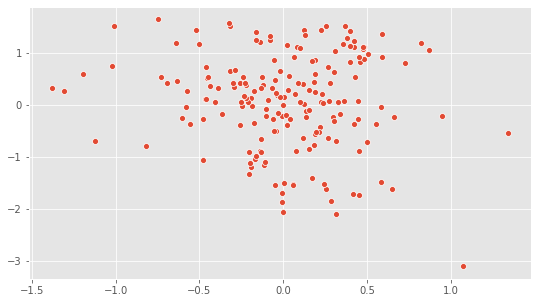

In [97]:
# Checking the distribution of Residuals in respect to the 'Y' predicted values

plt.figure(figsize=(9,5))
sns.scatterplot(residuals, X_test_prd_4)
plt.show()

- We don't see any specific relationship between the residuals and the dependent variable

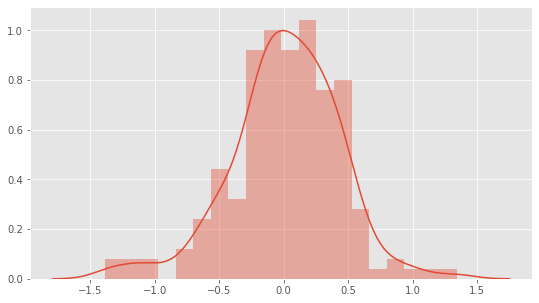

In [98]:
# Plotting the histogram of the error terms

plt.figure(figsize=(9,5))
sns.distplot(residuals, bins = 20)
plt.show()

- We can see the error terms are normally distributed

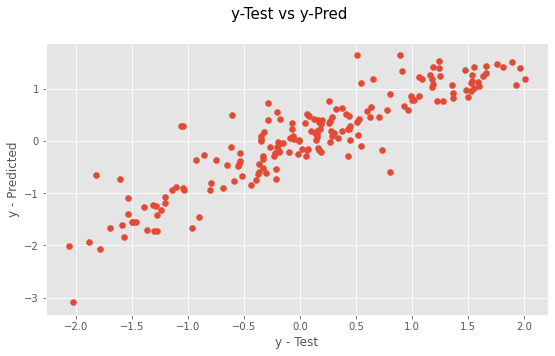

In [99]:
# Plotting y_test and y_pred to understand the spread.

plt.figure(figsize=(9,5))
plt.scatter(y_test,X_test_prd)
plt.suptitle('y-Test vs y-Pred', fontsize=15)
plt.xlabel('y - Test', fontsize=12)
plt.ylabel('y - Predicted', fontsize=12)
plt.show()

### Getting the model parameters

In [100]:
model_params = round(lm_ols_4.params, 3).sort_values()
print(model_params)

rainy       -1.132
2012        -1.023
holiday     -0.478
cloudy      -0.264
spring      -0.241
dec         -0.222
nov         -0.216
sat         -0.213
jan         -0.202
windspeed   -0.125
hum         -0.096
aug          0.206
summer       0.284
atemp        0.432
sep          0.438
const        0.529
winter       0.553
dtype: float64


#### Based on the model the most important 3 factors are , ‘season’, ‘yr’ and ‘holiday’.

We can see that the equation of the best fitted line is (coefficients are approximated to 3 decimal values):

$ cnt = 0.529 - 0.478  \times  holiday + 0.432  \times  atemp - 0.096 \times hum - 0.125
 \times windspeed -  0.241 \times spring + 0.284 \times summer + 0.553 \times winter - 1.023 \times 2012 - 0.213 \times sat - 0.264 \times cloudy - 1.132 \times rainy  + 0.206 \times aug - 0.222 \times dec - 0.202 \times jan - 0.216 \times nov + 0.438 \times sep $